In [1]:
%matplotlib inline 

# Association Rule Mining
***

## Table of Contents
***
* [Aim](#aim)
* [Code Setup](#code-setup)
* [Data Import](#data-import)

## Aim <a class="anchor" id="aim"></a>
***

The aim of this notebook is to perform Association Rule Mining on the Instacart Data

## Code Setup <a class="anchor" id="code-setup"></a>
***

### Constants

In [2]:
instacart_dir = "instacart_2017_05_01/"
my_orders_file = "my_orders.csv"
products_file = "products.csv"
aisles_file = "aisles.csv"
departments_file = "departments.csv"
orders_products_prior_file = "my_order_products__prior.csv"
orders_products_train_file = "my_order_products__train.csv"

### Import Libraries

In [3]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper")
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [4]:
te = TransactionEncoder()

In [5]:
def read_csv_file(file_name):
    return pd.read_csv(instacart_dir + file_name)

In [6]:
orders = read_csv_file(my_orders_file)
orders.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12202,472199,765,prior,1,2,21,NaN
1,12203,1424394,765,prior,2,1,21,20.0
2,12204,889292,765,prior,3,6,21,30.0
3,12205,2809253,765,prior,4,3,20,30.0
4,12206,2392861,765,prior,5,1,12,19.0


In [7]:
orders_products_prior = read_csv_file(orders_products_prior_file)
orders_products_train = read_csv_file(orders_products_train_file)
orders_products = pd.concat([orders_products_prior, orders_products_train])
orders_products.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,147221,15511,429,1,0
1,147222,15511,46397,2,0
2,147223,15511,27323,3,0
3,147224,15511,28842,4,1
4,147225,15511,4605,5,0


In [8]:
products = read_csv_file(products_file)
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
departments = read_csv_file(departments_file)
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
aisles = read_csv_file(aisles_file)
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
#a = apriori(df, min_support=0.1,use_colnames=True).sort_values(by='support',ascending=False)

In [12]:
products_ordered = orders_products.merge(products, on="product_id")
products_ordered.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,147221,15511,429,1,0,Dark Red Kidney Beans,59,15
1,147222,15511,46397,2,0,Reduced Sodium Great Northern Beans,59,15
2,147223,15511,27323,3,0,Pure & Natural Sour Cream,108,16
3,2527915,266611,27323,7,0,Pure & Natural Sour Cream,108,16
4,147224,15511,28842,4,1,Bunched Cilantro,16,4


In [17]:
products_ordered_total = (products_ordered.groupby('order_id')['product_name']
                          .apply(lambda x: "%s" % ','.join(x))
                          .reset_index(name='products')
                         )
products_ordered_total.head()

,order_id,products
0,15511,"Dark Red Kidney Beans,Reduced Sodium Great Nor..."
1,22082,"Organic Extra Large Brown Eggs,Organic Fruit P..."
2,26712,"Gluten Free Breaded Chicken Breast Tenders,1% ..."
3,27068,"Yellow Onions,Red Peppers,Yellow Bell Pepper,O..."
4,49162,"Bunched Cilantro,Red Peppers,Yellow Bell Peppe..."


In [19]:
products_ordered_list = products_ordered_total.products.tolist()
products_ordered_list_of_lists = []
for p in products_ordered_list:
    products_ordered_list_of_lists.append(p.split(','))
te_ary = te.fit(products_ordered_list_of_lists).transform(products_ordered_list_of_lists,sparse=False)
te_df = pd.DataFrame(te_ary, columns=te.columns_)
te_df.head()

,,& Cheese Biscuit,1000 Sheet Rolls,1‑Ply,97% Fat Free,98% Fat Free,All-Natural Clam Juice,Asparagus & Penne Pasta,Bag,Bibb) Lettuce,...,Yellow Peaches,YoBaby Peach Pear Yogurt,YoKids Squeezers Organic Low-Fat Yogurt,Yobaby Organic Plain Yogurt,Yogurt Tubes Blueberry,Yukon Gold Potatoes 5lb Bag,Z Bar Protein Peanut Butter Chocolate Protein Snack Bar,ZBar Organic Chocolate Brownie Energy Snack,Zero Soda,gel hand wash sea minerals
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
a = apriori(te_df, min_support=0.1,use_colnames=True).sort_values(by='support',ascending=False)
a.head()

,support,itemsets
0,0.221854,[2% Reduced Fat Organic Milk]
3,0.175497,[Vanilla Almond Breeze]
5,0.165563,"[2% Reduced Fat Organic Milk, Vanilla Almond B..."
2,0.139073,[Granny Smith Apples]
1,0.129139,[Banana]


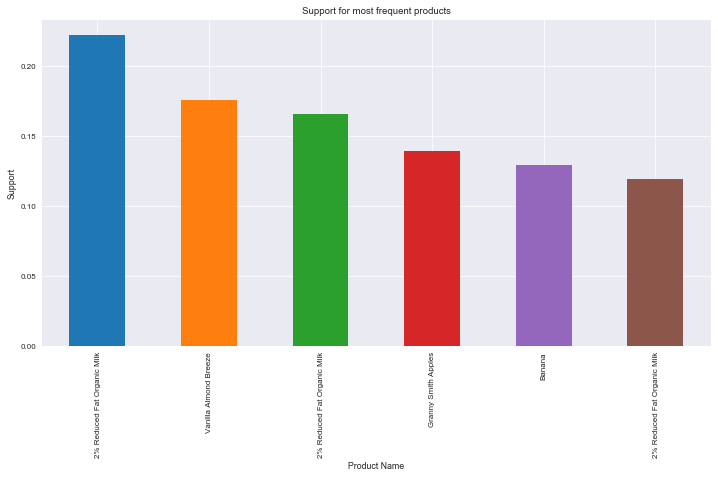

In [25]:
fig, ax = plt.subplots()
names = [n[0] for n in a["itemsets"]]
a['support'].plot.bar()
ax.set_xticklabels(names, rotation='vertical')
plt.title("Support for most frequent products")
plt.ylabel("Support")
plt.xlabel("Product Name")
plt.show()

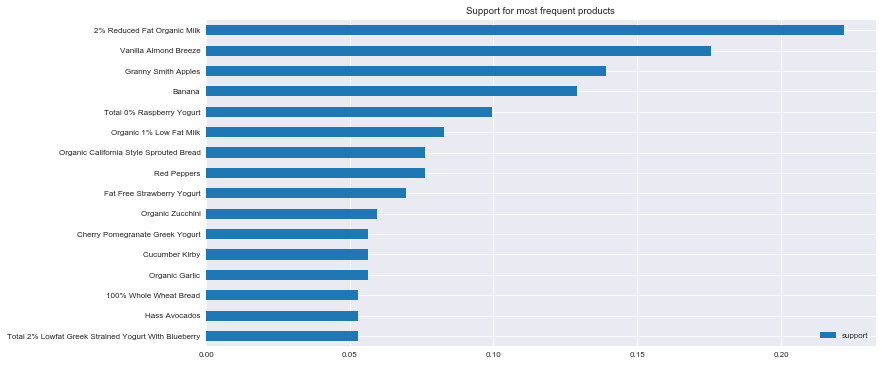

In [26]:
a = apriori(te_df, min_support=0.05, max_len=1, use_colnames=True) \
    .sort_values(by='support',ascending=False)
fig, ax = plt.subplots()
names = [n[0] for n in a["itemsets"]]
a.plot.barh(title ="Support for most frequent products")
plt.yticks(range(len(names)), names)
plt.gca().invert_yaxis()
plt.show()